## Determine Groups
This notebook is aimed at creating groups from our data in a data-drive way. Several methods will be experimented with till we find one that fits our data best.

In [14]:
# load the data in and check min, max, and counts
from pandas import DataFrame, Series, read_csv

#project_home = '/home/camachocm2/Analysis/EmoGrow/temperament/'
project_home = '/home/camachocm2/Analysis/aggregate_anats/'
data_dir = project_home + 'cleaned_data/'
results_dir = project_home + 'results/'

### Preprocess the temperament data
This cell standardizes the CBQ scales (i.e. convert to standard units)

In [15]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

data_file = data_dir + 'subject_data_20190311.csv'
data = read_csv(data_file)
cbq_data= data.iloc[:,1:14]

std = StandardScaler()
std.fit(cbq_data)
std_cbq = std.fit_transform(cbq_data)
labels = []
for a in cbq_data.columns:
    labels.append(a + '_std')
std_cbq_data = DataFrame(data=std_cbq,columns=labels)
std_cbq_data.describe()

,activity_level_std,anger_frustration_std,attention_focusing_std,discomfort_std,soothability_std,fear_std,high_intensity_pleasure_std,impulsivity_std,inhibitory_control_std,low_intensity_pleasure_std,perceptual_sensitivity_std,sadness_std,shyness_std
count,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02
mean,5.163828e-16,-1.032766e-16,-1.239319e-16,5.215466e-16,2.891744e-16,-3.640499e-16,-5.680211e-17,2.685191e-16,6.403147e-16,2.840105e-16,-1.445872e-16,-1.110223e-16,4.027786e-16
std,1.002920e+00,1.002920e+00,1.002920e+00,1.002920e+00,1.002920e+00,1.002920e+00,1.002920e+00,1.002920e+00,1.002920e+00,1.002920e+00,1.002920e+00,1.002920e+00,1.002920e+00
min,-2.558110e+00,-2.123528e+00,-3.233720e+00,-2.593291e+00,-2.869099e+00,-2.296085e+00,-2.796672e+00,-2.544537e+00,-3.070741e+00,-4.262515e+00,-3.657655e+00,-2.829359e+00,-2.171377e+00
25%,-6.614403e-01,-6.786418e-01,-6.495352e-01,-7.208605e-01,-8.095893e-01,-7.161060e-01,-6.568938e-01,-6.913125e-01,-6.669067e-01,-5.209154e-01,-6.607833e-01,-7.358026e-01,-7.351264e-01
50%,6.804787e-02,-8.368874e-02,6.829393e-02,5.017150e-02,7.305803e-02,7.388342e-02,5.636560e-02,4.997743e-02,-3.965477e-02,2.066178e-01,1.716810e-01,1.189630e-02,1.266238e-01
75%,7.975361e-01,7.379131e-01,7.861231e-01,6.376076e-01,8.085972e-01,7.322080e-01,7.696250e-01,7.527773e-01,6.852499e-01,7.262844e-01,6.711597e-01,6.474403e-01,7.011240e-01
max,2.110615e+00,1.956150e+00,1.934650e+00,2.546775e+00,2.132568e+00,2.575517e+00,1.910840e+00,2.644492e+00,2.037406e+00,1.349884e+00,1.836610e+00,2.554072e+00,2.424624e+00


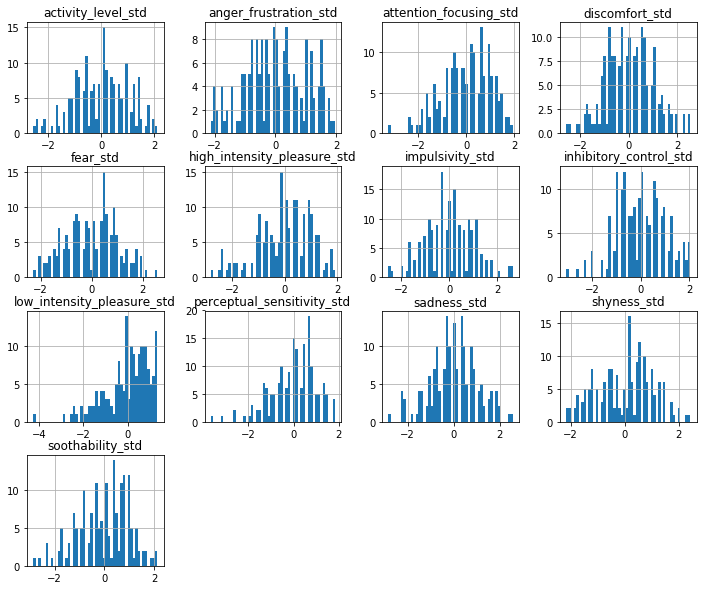

In [16]:
import matplotlib.pyplot as plt

std_cbq_data.hist(bins=50, figsize=(12,10))
plt.show()

In [17]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.analyze(std_cbq_data,4,rotation='varimax', method='ml', normalize=False)

print(fa.get_factor_variance())
factor_scores = fa.get_scores(std_cbq_data)
loads = fa.loadings
loads

                 Factor1   Factor2   Factor3   Factor4
SS Loadings     2.593255  1.611776  2.124307  0.703751
Proportion Var  0.199481  0.123983  0.163408  0.054135
Cumulative Var  0.199481  0.323464  0.486872  0.541007


,Factor1,Factor2,Factor3,Factor4
activity_level_std,0.308198,0.050348,0.696701,-0.020761
anger_frustration_std,0.868998,0.051170,0.203705,0.069221
attention_focusing_std,-0.416039,0.293271,-0.382288,-0.008932
discomfort_std,0.496428,0.279994,0.054832,0.303738
soothability_std,-0.730855,0.231138,-0.200432,0.100271
fear_std,0.152922,0.244490,0.034976,0.602893
high_intensity_pleasure_std,0.308355,0.374065,0.479600,-0.325559
impulsivity_std,0.205840,0.025850,0.800167,0.061586
inhibitory_control_std,-0.477260,0.390216,-0.518568,-0.095140
low_intensity_pleasure_std,-0.070500,0.695528,0.087212,0.231768


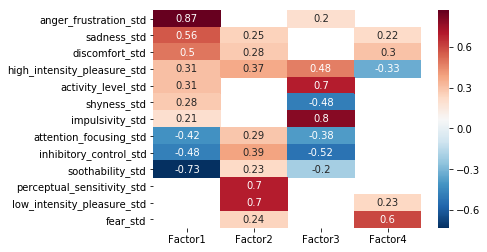

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
mask_upper = fa.loadings
mask_upper = mask_upper[mask_upper>.2]
mask_lower = fa.loadings
mask_lower = mask_lower[mask_lower<-0.2]
mask = mask_upper.radd(mask_lower, fill_value=0)
mask = mask.sort_values(by=['Factor1','Factor2','Factor3','Factor4'], ascending=False)
sns.heatmap(mask, annot=True, cmap='RdBu_r')
plt.savefig(results_dir + 'loadings.png')

# Characterizing the groups

In [19]:
from pandas import merge, read_csv

raw_data = read_csv(data_dir + 'aseg_data_20190311-151440.csv', index_col=0)
usability_key = read_csv(data_dir + 'usability_20190311.csv', index_col=None)
#cbq_data = read_csv(results_dir + '3kmeans_group_data.csv', index_col=0)
subject_info = read_csv(data_dir + 'subject_data_20190311.csv', index_col=None)

clean_data=DataFrame()
clean_data['freesurferID']=raw_data['SubjectID']
clean_data['eTIV']=raw_data['eTIV']

for region in ['Putamen','Pallidum','Caudate','Accumbens-area']:
    clean_data['Left-'+region] = raw_data['Left-'+region][usability_key['Left-'+region]==1]
    clean_data['Right-'+region] = raw_data['Right-'+region][usability_key['Right-'+region]==1]

#merged_data = clean_data.merge(cbq_data, on='freesurferID')
merged_data = clean_data.merge(subject_info, on='freesurferID')
merged_data = merged_data.join(factor_scores)

for region in ['Putamen','Pallidum','Caudate','Accumbens-area']:
    merged_data['tot'+region] = merged_data['Left-'+region] + merged_data['Right-'+region] #raw units
    merged_data['tot'+region+'_std'] = (merged_data['tot'+region] - merged_data['tot'+region].mean())/merged_data['tot'+region].std(ddof=0) #standard units

#for measure in ['internalizing','externalizing']:
#    merged_data[measure+'_std'] = (merged_data[measure] - merged_data[measure].mean())/merged_data[measure].std(ddof=0) #standard units

merged_data.to_csv(results_dir + 'combined_data_k3_20190311.csv')
merged_data.describe()

,eTIV,Left-Putamen,Right-Putamen,Left-Pallidum,Right-Pallidum,Left-Caudate,Right-Caudate,Left-Accumbens-area,Right-Accumbens-area,activity_level,...,Factor3,Factor4,totPutamen,totPutamen_std,totPallidum,totPallidum_std,totCaudate,totCaudate_std,totAccumbens-area,totAccumbens-area_std
count,1.700000e+02,164.000000,164.000000,166.000000,168.000000,162.000000,162.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,162.000000,1.620000e+02,166.000000,1.660000e+02,159.000000,1.590000e+02,170.000000,1.700000e+02
mean,1.475496e+06,5260.907927,5299.481098,2007.439157,1924.009524,3817.351235,3943.437037,573.248824,608.578824,4.635107,...,0.001918,-0.000500,10556.724074,-3.508853e-16,3930.083133,-1.177104e-16,7771.789937,-5.139146e-16,1181.827647,-7.314411e-16
std,1.526292e+05,704.445068,642.339641,241.508236,247.638593,519.064412,545.901338,117.058118,105.204463,0.980770,...,0.898718,0.742894,1327.862575,1.003101e+00,460.285619,1.003026e+00,1040.354226,1.003160e+00,212.210945,1.002954e+00
min,1.142335e+06,3556.100000,3747.700000,1520.600000,1396.600000,2531.100000,2726.100000,371.300000,411.300000,2.142857,...,-2.411732,-1.772368,7594.500000,-2.237739e+00,2929.500000,-2.180408e+00,5390.400000,-2.296251e+00,849.100000,-1.572542e+00
25%,1.367272e+06,4778.350000,4857.775000,1823.375000,1747.725000,3503.225000,3595.450000,494.875000,548.325000,4.000000,...,-0.540966,-0.518951,9662.725000,-6.753494e-01,3585.075000,-7.518202e-01,7105.150000,-6.428063e-01,1038.525000,-6.772789e-01
50%,1.481759e+06,5225.150000,5201.400000,1992.500000,1905.500000,3801.200000,3901.200000,560.300000,595.450000,4.714286,...,-0.041020,0.034110,10425.000000,-9.950768e-02,3876.000000,-1.178546e-01,7761.600000,-9.825627e-03,1145.200000,-1.731101e-01
75%,1.578570e+06,5724.725000,5777.800000,2169.250000,2114.075000,4074.675000,4248.500000,644.100000,666.450000,5.285714,...,0.575888,0.464894,11501.900000,7.140097e-01,4278.200000,7.585946e-01,8315.650000,5.244160e-01,1295.900000,5.391303e-01
max,1.975068e+06,7658.500000,7436.300000,2712.700000,2570.800000,5572.700000,5889.900000,1115.900000,1127.400000,6.714286,...,2.336749,2.072877,15094.800000,3.428177e+00,5240.900000,2.856450e+00,11462.600000,3.558857e+00,2243.300000,5.016745e+00


In [20]:
merged_data.columns

Index(['freesurferID', 'eTIV', 'Left-Putamen', 'Right-Putamen',
       'Left-Pallidum', 'Right-Pallidum', 'Left-Caudate', 'Right-Caudate',
       'Left-Accumbens-area', 'Right-Accumbens-area', 'activity_level',
       'anger_frustration', 'attention_focusing', 'discomfort', 'soothability',
       'fear', 'high_intensity_pleasure', 'impulsivity', 'inhibitory_control',
       'low_intensity_pleasure', 'perceptual_sensitivity', 'sadness',
       'shyness', 'MAP_Temper_Loss', 'MAP_Noncompliance',
       'MAP_General_Aggression', 'MAP_Low_Concern', 'CBCL_internalizing',
       'CBCL_externalizing', 'Factor1', 'Factor2', 'Factor3', 'Factor4',
       'totPutamen', 'totPutamen_std', 'totPallidum', 'totPallidum_std',
       'totCaudate', 'totCaudate_std', 'totAccumbens-area',
       'totAccumbens-area_std'],
      dtype='object')

In [21]:
import matplotlib
from pandas import read_csv,DataFrame, Series
import seaborn as sns
import matplotlib.pyplot as plt

results_dir = '/home/camachocm2/Analysis/aggregate_anats/results/'

data = read_csv(results_dir + 'residual_complete_data.csv', index_col=0)
data_long = melt(data, id_vars=['freesurferID', 'eTIV', 'Left-Putamen', 'Right-Putamen',
                                'Left-Pallidum', 'Right-Pallidum', 'Left-Caudate', 'Right-Caudate',
                                'Left-Accumbens-area', 'Right-Accumbens-area', 'Left-Amygdala',
                                'Right-Amygdala', 'Left-Hippocampus', 'Right-Hippocampus',
                                'activity_level', 'anger_frustration', 'attention_focusing',
                                'discomfort', 'soothability', 'fear', 'high_intensity_pleasure',
                                'impulsivity', 'inhibitory_control', 'low_intensity_pleasure',
                                'perceptual_sensitivity', 'sadness', 'shyness', 'activity_level_std',
                                'anger_frustration_std', 'attention_focusing_std', 'discomfort_std',
                                'soothability_std', 'fear_std', 'high_intensity_pleasure_std',
                                'impulsivity_std', 'inhibitory_control_std','low_intensity_pleasure_std', 
                                'perceptual_sensitivity_std','sadness_std', 'shyness_std', 'kmgroup', 
                                'SubjectID', 'Study','Sequence Version', 'in_analysis', 'Same Kid as:', 
                                'Dx_Group','Age_yrs', 'Age_mos', 'male', 'clinical', 'smd', 'adhd', 'meds',
                                'internalizing', 'externalizing','totPutamen', 'totPutamen_std', 
                                'totPallidum', 'totPallidum_std','totCaudate', 'totCaudate_std', 
                                'totAccumbens-area','totAccumbens-area_std', 'totAmygdala', 
                                'totAmygdala_std','totHippocampus', 'totHippocampus_std', 
                                'internalizing_std','externalizing_std','res_pall','res_putamen'], 
                 value_vars=['Factor1', 'Factor2', 'Factor3'], var_name='Factor',value_name='score')

sns.set_context('poster')
# Visualize results

plt.figure(figsize=(6,6))
sns.lmplot(x='score',y='res_putamen',data=data_long,col='Factor',hue='Factor',ci=95)
#plt.savefig(results_dir + 'putamen_factors.svg',transparent=True)
plt.show()

FileNotFoundError: File b'/home/camachocm2/Analysis/aggregate_anats/results/residual_complete_data.csv' does not exist

In [120]:
from pandas import concat, merge
factors = merge([data['Factor2'],data['Factor3']],)
factors.head()

TypeError: merge() missing 1 required positional argument: 'right'

ValueError: Could not interpret input 'Sequence Version'

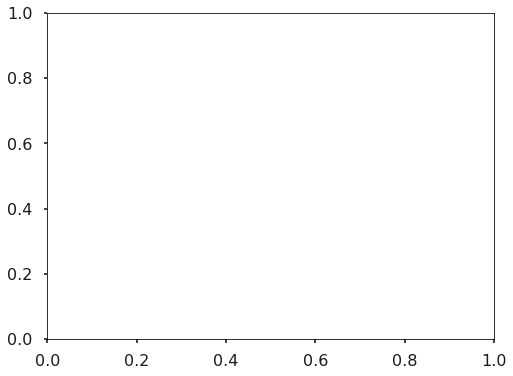

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('poster')

fig, ax = plt.subplots(figsize=(8,6))
sns.set(style='whitegrid',  palette='pastel', color_codes=True)
sns.violinplot(x='Sequence Version', y='Age_yrs', hue='male', data=data, split=True,inner='quart')
sns.despine(left=True)
ax.legend_.remove()
plt.savefig(project_home + 'age_sex_sample.png')

seq1 = data[data['Sequence Version']==1]
seq2 = data[data['Sequence Version']==2]
seq3 = data[data['Sequence Version']==3]

plt.figure()
plt.hist([seq1['Age_yrs'],seq2['Age_yrs'],seq3['Age_yrs']], bins=9, stacked=True, edgecolor='black', label=['20chTrio','20chTrio2','64chMMR'])
plt.legend()
plt.show()